Data loaded successfully.
Sector-wise Investment Analysis:
Sector
SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)    59476.49
COMPUTER SOFTWARE & HARDWARE                                                                                           24669.49
CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects            24293.09
TELECOMMUNICATIONS                                                                                                     23946.01
AUTOMOBILE INDUSTRY                                                                                                    16673.92
                                                                                                                         ...   
PHOTOGRAPHIC RAW FILM AND PAPER                                                                                           67.28
COAL PRODUCTION                       

C:\Users\MEHAK KAUR\AppData\Local\Temp\ipykernel_20636\250048132.py:71: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


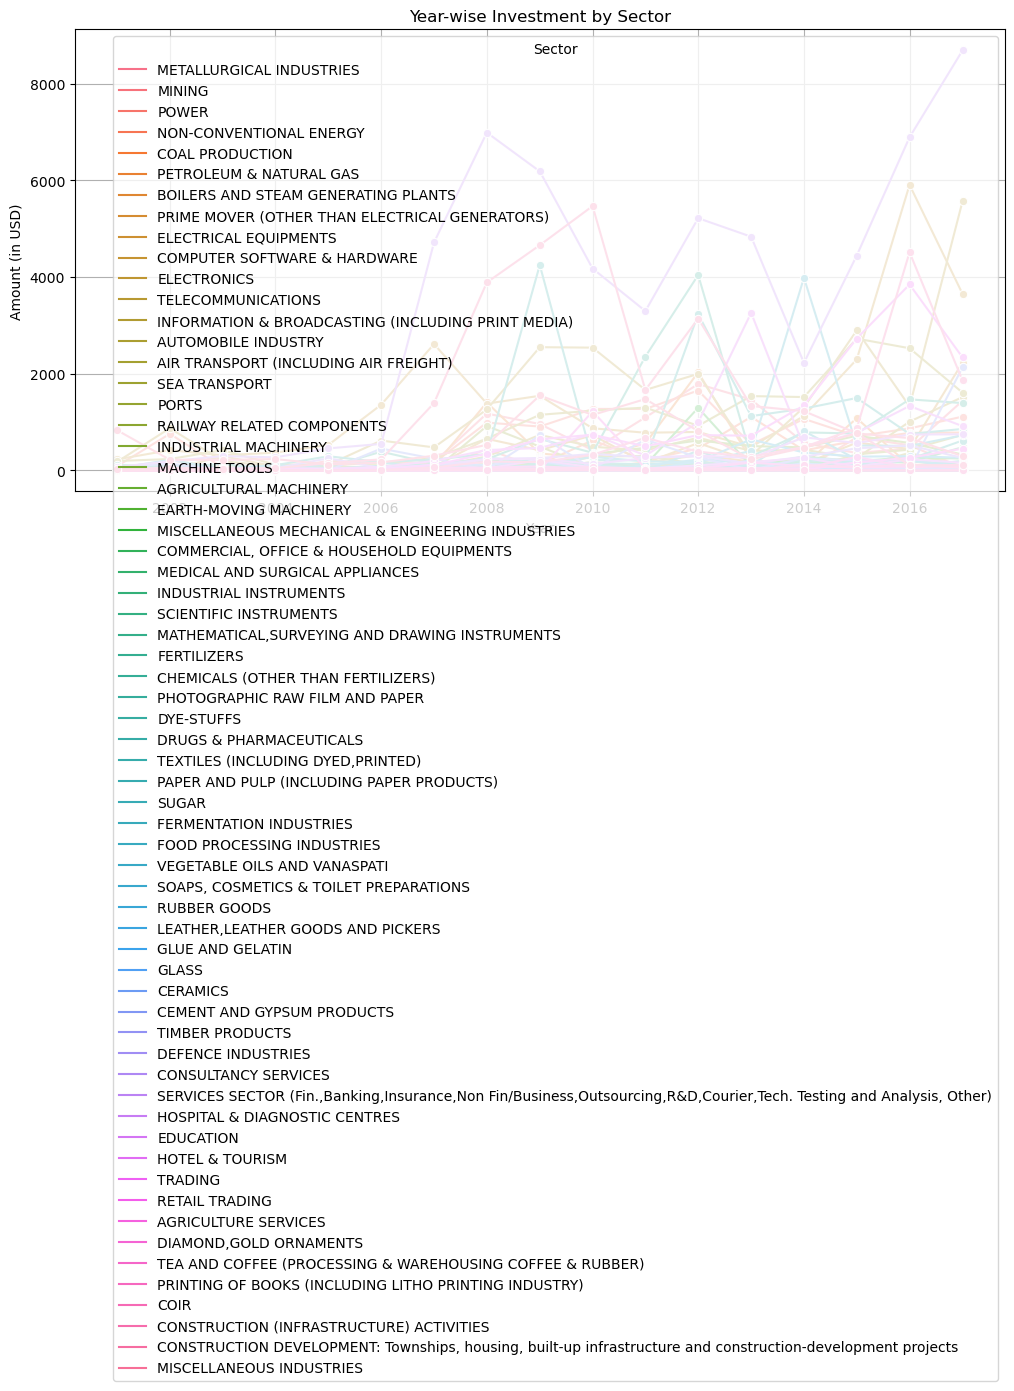

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print("Data loaded successfully.")
        return data
    except FileNotFoundError:
        print(f"File not found at {file_path}. Please provide the correct file path.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Reshape the dataset from wide to long format
def reshape_data(data):
    try:
        # Melt the dataframe to convert from wide to long format
        data_long = pd.melt(data, id_vars=['Sector'], var_name='Year', value_name='Amount')
        # Convert 'Year' column to datetime format
        data_long['Year'] = pd.to_datetime(data_long['Year'], format='%Y-%y')
        return data_long
    except Exception as e:
        print(f"An error occurred while reshaping the data: {e}")
        return None

# Sector-wise investment analysis
def sector_analysis(data):
    try:
        sector_totals = data.groupby('Sector')['Amount'].sum().sort_values(ascending=False)
        return sector_totals
    except KeyError:
        print("Column 'Amount' not found. Please check the column names in your reshaped data.")
        return None

# Year-wise investment analysis
def year_analysis(data):
    try:
        year_totals = data.groupby('Year')['Amount'].sum()
        return year_totals
    except KeyError:
        print("Column 'Year' or 'Amount' not found. Please check the column names in your reshaped data.")
        return None

# Find key metrics
def key_metrics(data):
    try:
        metrics = {
            'Total Investment': data['Amount'].sum(),
            'Average Investment': data['Amount'].mean(),
            'Max Investment': data['Amount'].max(),
            'Min Investment': data['Amount'].min()
        }
        return metrics
    except KeyError:
        print("Column 'Amount' not found. Please check the column names in your reshaped data.")
        return None

# Plotting meaningful relationships
def plot_relationships(data):
    try:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x='Year', y='Amount', hue='Sector', data=data, marker='o')
        plt.title('Year-wise Investment by Sector')
        plt.xlabel('Year')
        plt.ylabel('Amount (in USD)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except KeyError:
        print("Column 'Year' or 'Amount' not found. Please check the column names in your reshaped data.")

# Main function
def main():
    file_path = r"C:\Users\MEHAK KAUR\Downloads\FDI data.csv"
    
    # Load data
    data = load_data(file_path)
    if data is None:
        return
    
    # Reshape data
    data_long = reshape_data(data)
    if data_long is None:
        return
    
    # Sector-wise analysis
    sector_totals = sector_analysis(data_long)
    if sector_totals is not None:
        print("Sector-wise Investment Analysis:")
        print(sector_totals)
        print("\n")
    
    # Year-wise analysis
    year_totals = year_analysis(data_long)
    if year_totals is not None:
        print("Year-wise Investment Analysis:")
        print(year_totals)
        print("\n")
    
    # Key metrics
    metrics = key_metrics(data_long)
    if metrics is not None:
        print("Key Metrics:")
        for key, value in metrics.items():
            print(f"{key}: {value}")
        print("\n")
    
    # Plot relationships
    plot_relationships(data_long)

# Execute the main function
if __name__ == "__main__":
    main()
